### Authors: Cory, Ian, and Michael
### Date: July 30, 2019
### Data Sources: 
- [IMDB](https://www.imdb.com/interfaces/)
- [The-Numbers.com](https://www.the-numbers.com/movie/budgets/all)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_exploration.preprocessor import transform, read_movie_data
from data_exploration.visualization import transform_data_for_visualization, create_genre_boxplot
%matplotlib notebook

# Movie Investments for Microsoft

## Results: Animation targets the largest audience and has consistent returns on investment.
- Animation has the highest .25 quartile for both domestic revenue and domestic ROI.  
- We conclude that animation reaches the most viewers while maintaining profitability.

### Domestic gross revenue (millions USD)
![animation_domestic_gross](./visualizations/animation_domestic_gross.png "Domestic Gross")

### Limitations
- The data is limited to movies released between 2008 - 2019.
- Genres that did not have enough movies were dropped from analysis and not included in visualizations.
- Animation has 100 movies in this timeframe and is significaly less than other genres such as drama.

### Analysis Method
We loaded genre and rating data from IMDB and joined it with revenue and production budgets from The Numbers.  Movies that have multiple genres were split into multiple rows.  This allowed us to account for all of the genres a movie is in.  

We started by reviewing the median revenue of each genre in a bar chart. We then moved on to boxplots that compare each genre.  Our final decision was based on the genre that has the highest .25 quartile in domestic revenue and domestic return on investment(ROI). We chose this method becase the highest revenue indicates the largest audience was reached.  Microsoft's new platform needs to reach a large portion of the US market on launch to gain subscribers.

##### Load data, merge sources together, and clean.

In [15]:
imdb_title_basics, imdb_title_ratings, tn_movie_budgets = read_movie_data()
movie_data = transform(imdb_title_basics, imdb_title_ratings, tn_movie_budgets)

##### Prepare data for visualizations

In [16]:
# This steps removes genres unpopular genres.
most_common_movies_by_genre = transform_data_for_visualization(movie_data)

### Domestic Gross Analysis

The following boxplot graphs is ordered by the .25 quartile of the domestic gross revenue.  Animation has the highest probablily of generating a high revenue.

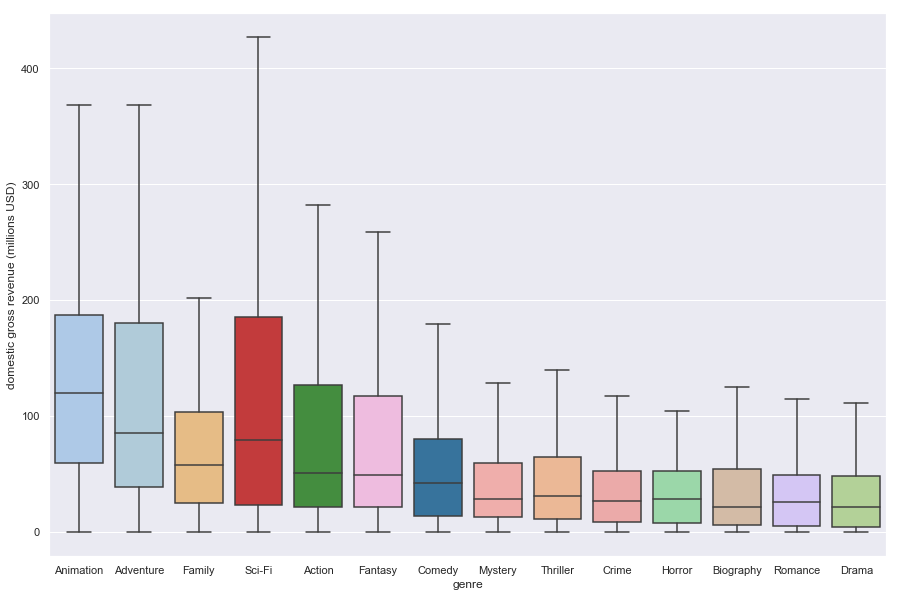

In [17]:
ax = create_genre_boxplot(most_common_movies_by_genre, 'domestic_gross', ylable='domestic gross revenue (millions USD)');


The following boxplot graphs is ordered by the .25 quartile of the domestic return on investment.  Animation is less likely to have negative ROI.

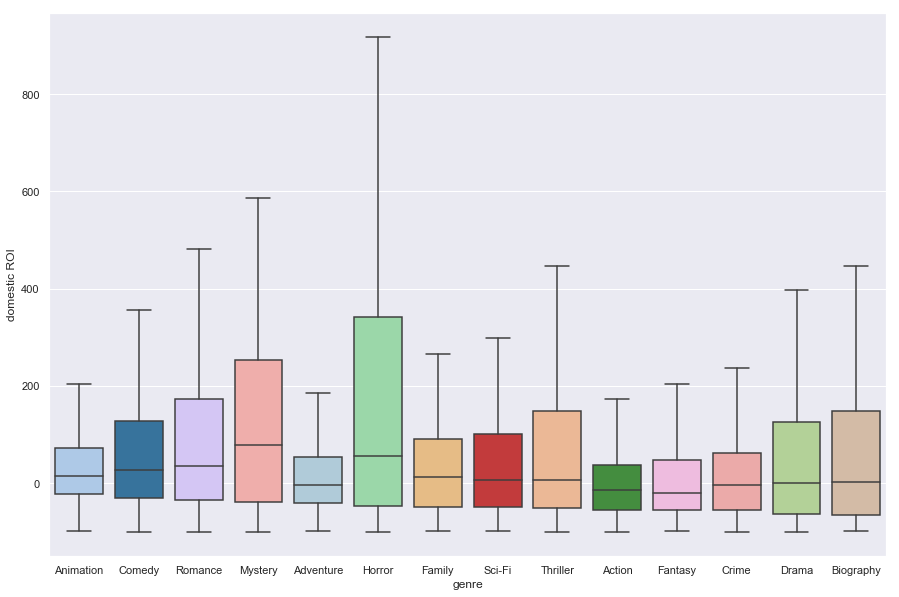

In [8]:
ax = create_genre_boxplot(most_common_movies_by_genre, 'dom_roi', ylable='domestic ROI');

### World Analysis

World numbers show similar results as domestic.  This approach will scale to a global audience.  

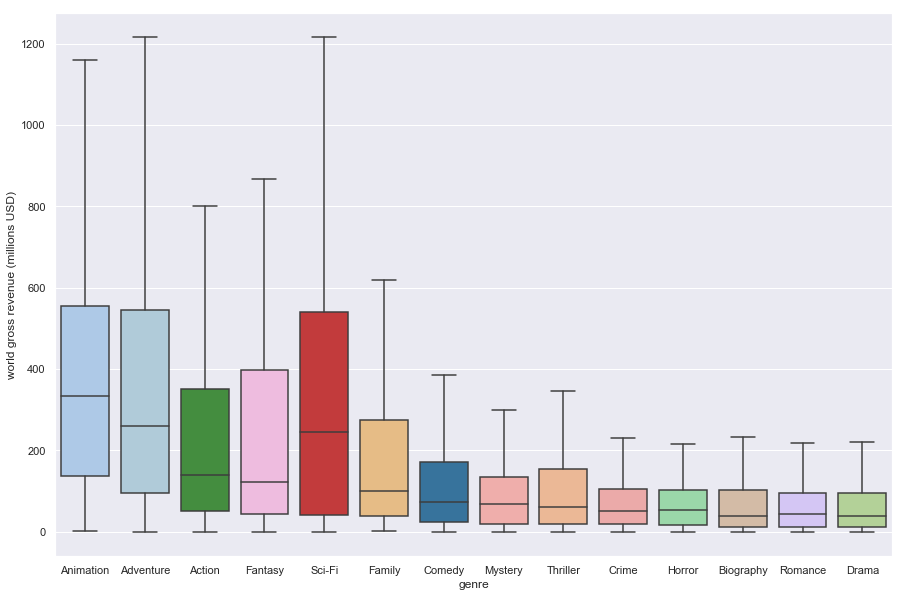

In [9]:
ax = create_genre_boxplot(most_common_movies_by_genre, 'worldwide_gross', ylable='world gross revenue (millions USD)');


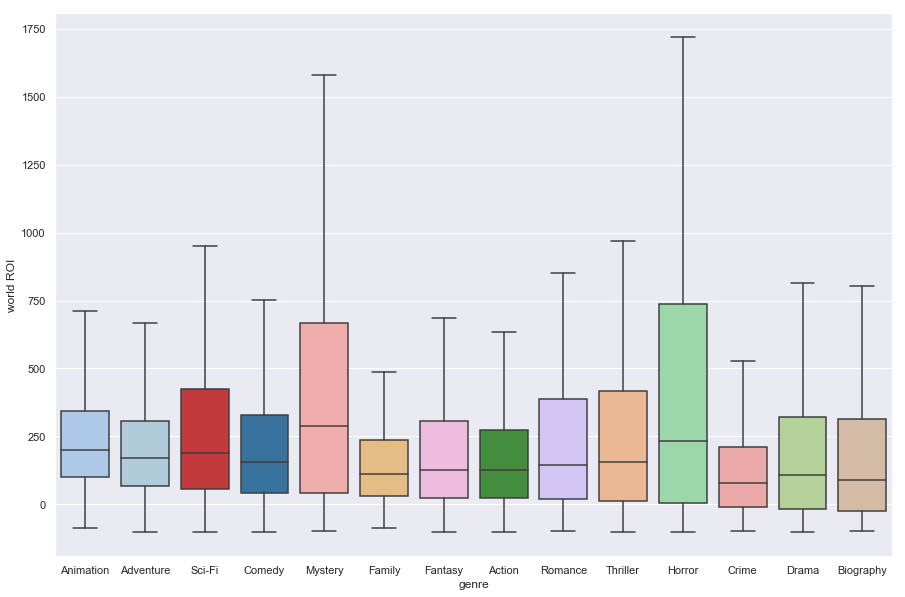

In [12]:
ax = create_genre_boxplot(most_common_movies_by_genre, 'world_roi', ylable='world ROI');